# Questions 3 - Does the month of release affect the worldwide Gross?

### Findings

The Best Month on average for gross revenue has changed throughout the decades. July has stayed constant in the top 2. Notably, December releases have become less and less profitable.

### Recommendations:

For highest revenue, look at releasing movies in July and November

# Importing Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../cleandata/movierevenue.csv',index_col = 0)
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_released,age,day,daynumber,month,markup,profitmargin,netprofit
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,11,Friday,4,12,5.532577,0.846921,2351345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,9,Friday,4,5,1.546673,0.607331,635063875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,1,Friday,4,6,-0.572108,-1.337036,-200237650
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,Friday,4,5,3.243841,0.764364,1072413963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,3,Friday,4,12,3.153696,0.759251,999721747


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 14 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
year_released        5782 non-null int64
age                  5782 non-null int64
day                  5782 non-null object
daynumber            5782 non-null int64
month                5782 non-null int64
markup               5782 non-null float64
profitmargin         5782 non-null float64
netprofit            5782 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 677.6+ KB


In [4]:
df.groupby('day')['worldwide_gross'].count().sort_values(ascending = False)

day
Friday       4539
Wednesday     621
Tuesday       290
Thursday      172
Monday         59
Saturday       56
Sunday         45
Name: worldwide_gross, dtype: int64

# Checking Distribution of Data

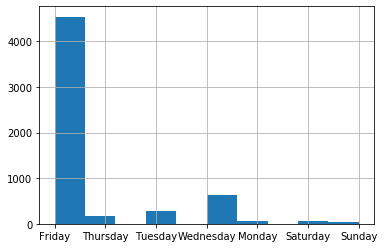

In [5]:
df['day'].hist()

mean      9.148746e+07
median    2.798445e+07
Name: worldwide_gross, dtype: float64

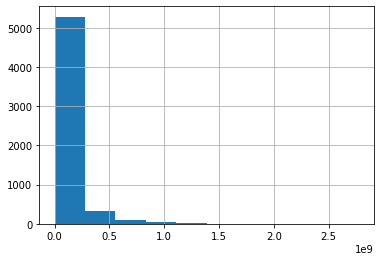

In [6]:
df['worldwide_gross'].hist()
df['worldwide_gross'].agg(['mean','median'])

mean      5.989970e+07
median    8.550286e+06
Name: netprofit, dtype: float64

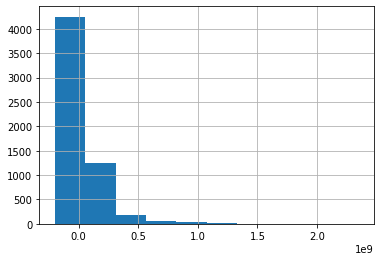

In [7]:
df['netprofit'].hist()
df['netprofit'].agg(['mean','median'])

mean      7.050675
median    7.000000
Name: month, dtype: float64

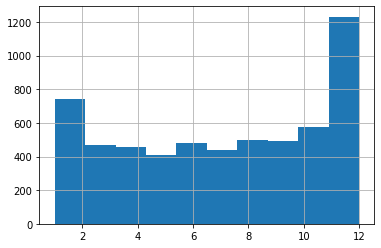

In [8]:
df['month'].hist()
df['month'].agg(['mean','median'])

In [9]:
# data is skewed 

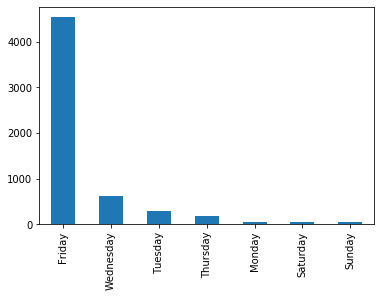

In [10]:
df['day'].value_counts().plot(kind= 'bar')

# From this it is clear that Friday is the most popular choice of day to release a movie
**Let's explore this further**

Text(0, 0.5, ' Gross Revenue (Billions USD)')

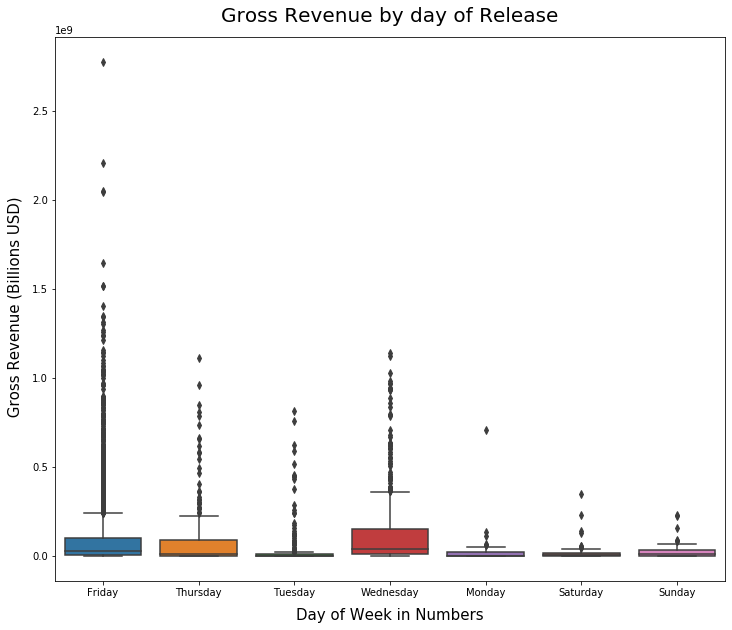

In [11]:
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(12,10))
ax = sns.boxplot(x='day',y='worldwide_gross', data=df)
ax.set_title("Gross Revenue by day of Release", size = 20, pad = 15);


ax.set_xlabel("Day of Week in Numbers", size = 15, labelpad = 10)
ax.set_ylabel(" Gross Revenue (Billions USD)", size = 15, labelpad =10)

Text(0, 0.5, ' Gross Revenue (Billions USD)')

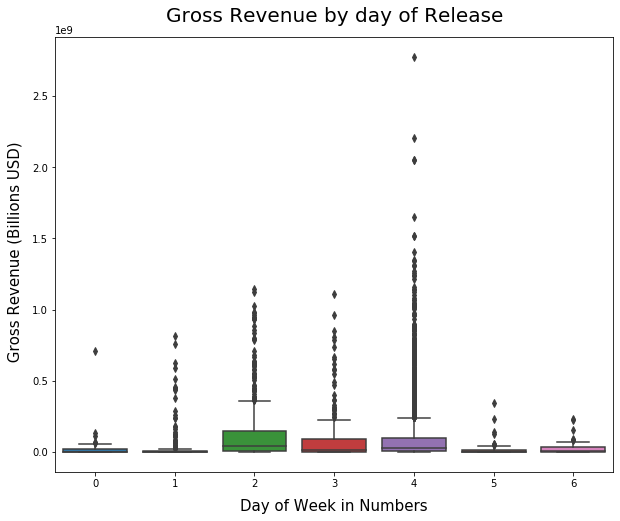

In [12]:
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(10,8))
ax = sns.boxplot(x='daynumber',y='worldwide_gross', data=df)
ax.set_title("Gross Revenue by day of Release", size = 20, pad = 15);


ax.set_xlabel("Day of Week in Numbers", size = 15, labelpad = 10)
ax.set_ylabel(" Gross Revenue (Billions USD)", size = 15, labelpad =10)


### Grouped by median


In [13]:

gross_median_day = pd.DataFrame(df.groupby('day')['worldwide_gross'].median())
gross_median_day.reset_index(inplace = True)
gross_median_day


,day,worldwide_gross
0,Friday,31222395.0
1,Monday,1050861.0
2,Saturday,3414200.0
3,Sunday,9370285.0
4,Thursday,13796144.5
5,Tuesday,6089.5
6,Wednesday,41560117.0


Text(0.5, 1.0, 'Average Gross Revenue based on Day of Release')

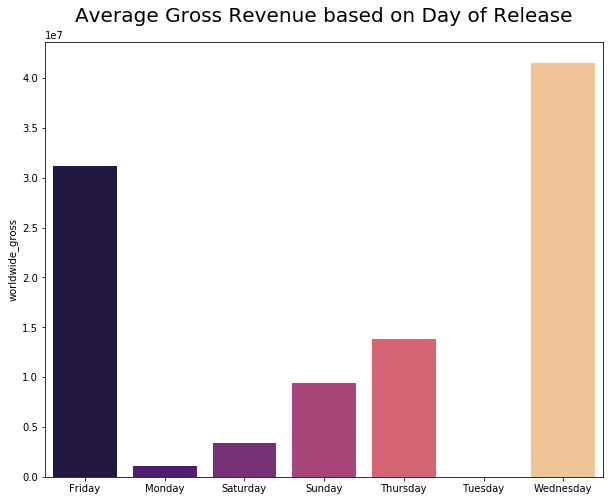

In [14]:
fig, axes=plt.subplots(nrows=1, ncols=1 , figsize=(10,8))

ax = sns.barplot(data=gross_median_day, x='day',y='worldwide_gross', palette = 'magma')
ax.set_xlabel("")
ax.set_label("Gross Revenue")
ax.set_title("Average Gross Revenue based on Day of Release", pad = 20, size = 20)

# Now Let's Explore the effect of the month of release

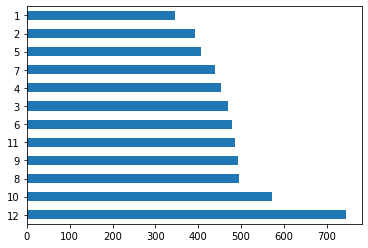

In [15]:
df['month'].value_counts().plot(kind= 'barh')

The month of release is distributed far more evenly than the day - With December being most popular

## Box plots for Release Month

Text(0, 0.5, ' Worldwide Gross ( USD) ')

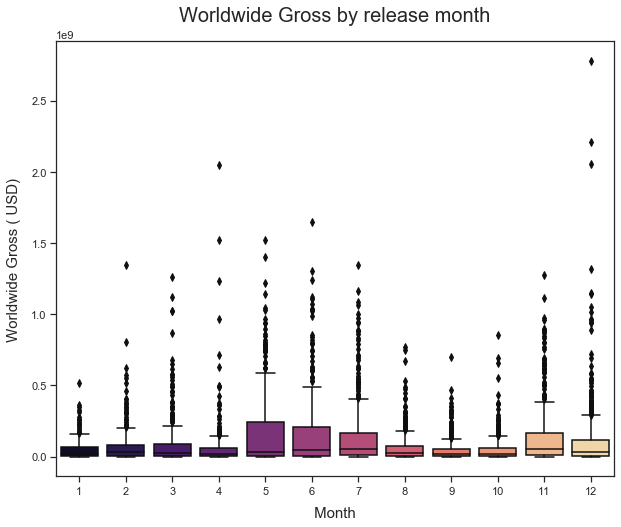

In [16]:
sns.set(style='ticks')

fig, axes=plt.subplots(nrows=1, ncols=1 , figsize=(10,8))
ax = sns.boxplot(x='month',y='worldwide_gross', data=df, palette = 'magma')
ax.set_title("Worldwide Gross by release month", pad = 20, size = 20);

ax.set_xlabel(' Month ', labelpad = 10, size = 15)
ax.set_ylabel(' Worldwide Gross ( USD) ', labelpad = 10, size = 15)

### Sum

In [17]:
gross_sum_month = pd.DataFrame(df.groupby('month')['worldwide_gross'].sum().sort_values(ascending = False))
gross_sum_month.reset_index(inplace = True)
gross_sum_month


,month,worldwide_gross
0,12,75761412153
1,6,68268531657
2,5,66043077615
3,11,65970430672
4,7,62023990453
5,3,37897684431
6,8,30245291880
7,10,28343193867
8,2,28045454121
9,4,27203797390


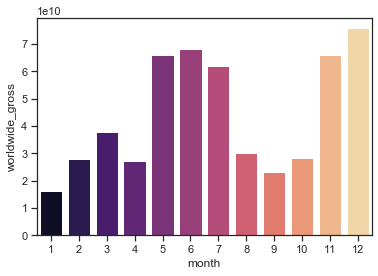

In [18]:
sns.barplot(data=gross_sum_month, x='month',y='worldwide_gross', palette = 'magma')

### Mean

In [19]:
gross_mean_month = pd.DataFrame(df.groupby('month')['worldwide_gross'].mean().sort_values(ascending = False))
gross_mean_month.reset_index(inplace = True)
gross_mean_month


,month,worldwide_gross
0,5,1.622680e+08
1,6,1.425230e+08
2,7,1.409636e+08
3,11,1.357416e+08
4,12,1.016932e+08
5,3,8.063337e+07
6,2,7.154453e+07
7,8,6.097841e+07
8,4,5.992026e+07
9,10,4.946456e+07


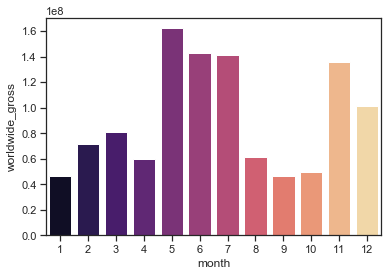

In [20]:
sns.barplot(data=gross_mean_month, x='month',y='worldwide_gross', palette = 'magma')

### Median

In [21]:
gross_median_month = pd.DataFrame(df.groupby('month')['worldwide_gross'].median().sort_values(ascending = False))
gross_median_month.reset_index(inplace = True)
gross_median_month

,month,worldwide_gross
0,7,51134699.5
1,11,50530475.5
2,6,46844357.0
3,2,33097834.5
4,12,31166312.0
5,5,29934477.0
6,3,25599836.0
7,8,24202936.5
8,1,20169934.0
9,4,20068010.0


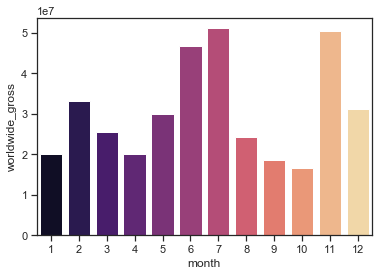

In [22]:
sns.barplot(data=gross_median_month, x='month',y='worldwide_gross', palette = 'magma')

Text(0.5, 1.0, 'Average Gross Revenue based on Month of Release')

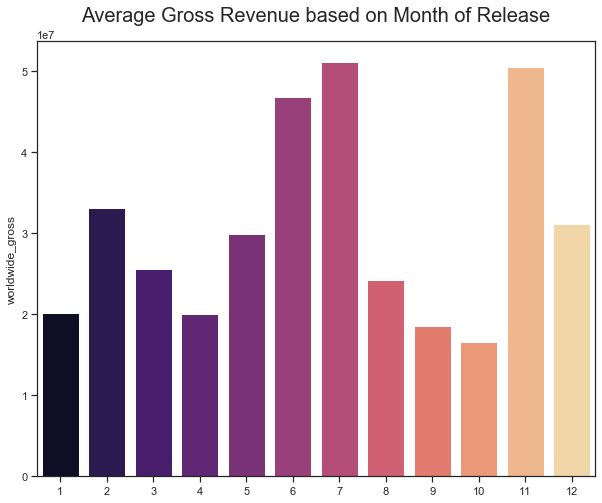

In [23]:
fig, axes=plt.subplots(nrows=1, ncols=1 , figsize=(10,8))

ax = sns.barplot(data=gross_median_month, x='month',y='worldwide_gross', palette = 'magma')
ax.set_xlabel("")
ax.set_label("Gross Revenue")
ax.set_title("Average Gross Revenue based on Month of Release", pad = 20, size = 20)

# Calling the last 4 decades dataframe I made in Question 1 notebook

In [73]:
%store -r df2010
%store -r df2000
%store -r df1990
%store -r df1980


In [74]:
df2010.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_released,age,decades,day,daynumber,month,markup,profitmargin,netprofit
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,9,0,Friday,4,5,1.546673,0.607331,635063875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,1,0,Friday,4,6,-0.572108,-1.337036,-200237650
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,0,Friday,4,5,3.243841,0.764364,1072413963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,3,0,Friday,4,12,3.153696,0.759251,999721747
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,5,0,Friday,4,12,5.710167,0.850972,1747311220


# Making Data Frames for the median Worldwide Gross by month for each decade for comparison 

In [75]:
avg1980 = pd.DataFrame(df1980.groupby('month')['worldwide_gross'].median())
avg1980.reset_index(inplace = True)
avg1980

avg1990 = pd.DataFrame(df1990.groupby('month')['worldwide_gross'].median())
avg1990.reset_index(inplace = True)
avg1990

avg2000 = pd.DataFrame(df2000.groupby('month')['worldwide_gross'].median())
avg2000.reset_index(inplace = True)
avg2000

avg2010 = pd.DataFrame(df2010.groupby('month')['worldwide_gross'].median())
avg2010.reset_index(inplace = True)
avg2010

,month,worldwide_gross
0,1,36285960.5
1,2,43299774.5
2,3,20592763.0
3,4,17478366.5
4,5,43061376.0
5,6,29867459.5
6,7,57273049.0
7,8,40650842.0
8,9,22281732.0
9,10,12429202.0


In [76]:
avg1990

,month,worldwide_gross
0,1,10013789.5
1,2,18794100.5
2,3,26317943.0
3,4,14971211.0
4,5,29203383.0
5,6,152022333.0
6,7,77637890.5
7,8,16153000.0
8,9,17747060.0
9,10,17365195.5


(0, 160000000)

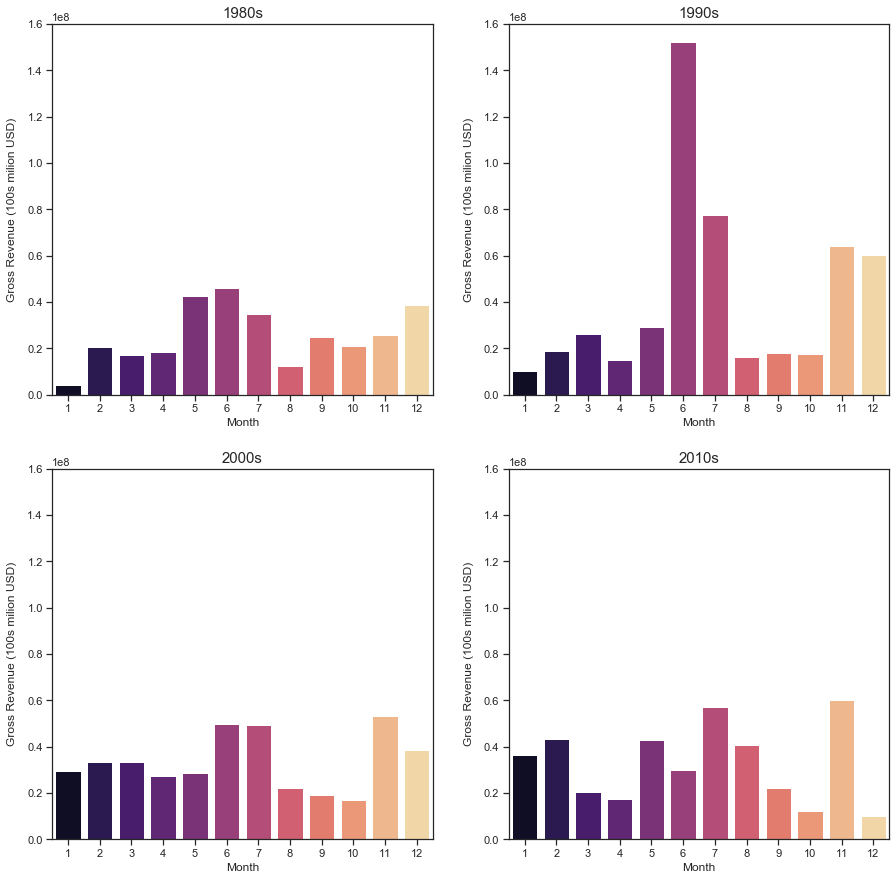

In [77]:
fig, axes=plt.subplots(nrows=2, ncols=2, figsize=(15,15))
ax = axes[0][0]
ax1 = axes[0][1]
ax2 = axes[1][0]
ax3 = axes[1][1]

sns.barplot(x='month',y='worldwide_gross',data=avg1980, ax = ax,palette ='magma')
sns.barplot(x='month',y='worldwide_gross',data=avg1990, ax = ax1,palette ='magma')
sns.barplot(x='month',y='worldwide_gross',data=avg2000, ax = ax2,palette ='magma')
sns.barplot(x='month',y='worldwide_gross',data=avg2010, ax = ax3,palette ='magma')
ax.set_title('1980s', size = 15)
ax1.set_title('1990s', size = 15)
ax2.set_title('2000s', size = 15)
ax3.set_title('2010s', size = 15)

ax.set_xlabel('Month')
ax1.set_xlabel('Month')
ax2.set_xlabel('Month')
ax3.set_xlabel('Month')

ax.set_ylabel('Gross Revenue (100s milion USD)',labelpad = 10, size = 12)
ax1.set_ylabel('Gross Revenue (100s milion USD)',labelpad = 10, size = 12)
ax2.set_ylabel('Gross Revenue (100s milion USD)',labelpad = 10, size = 12)
ax3.set_ylabel('Gross Revenue (100s milion USD)',labelpad = 10, size = 12)



ax.set_ylim(0,160000000)
ax1.set_ylim(0,160000000)
ax2.set_ylim(0,160000000)
ax3.set_ylim(0,160000000)


In [78]:
dfjune = df1990.loc[df1990['month'] == 6]

In [79]:
dfjune.sort_values(by = 'worldwide_gross', ascending = False).head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_released,age,decades,day,daynumber,month,markup,profitmargin,netprofit
824,25,1993-06-11,Jurassic Park,63000000,395708305,1038812584,1993,27,2,Friday,4,6,15.489089,0.939354,975812584
608,9,1994-06-15,The Lion King,79300000,421785283,986214868,1994,26,2,Wednesday,2,6,11.436505,0.919592,906914868
199,100,1999-06-16,Tarzan,145000000,171091819,448191819,1999,21,2,Wednesday,2,6,2.090978,0.676478,303191819
1085,86,1991-06-14,Robin Hood: Prince of Thieves,50000000,165493908,390500000,1991,29,2,Friday,4,6,6.810000,0.871959,340500000
987,88,1995-06-10,Pocahontas,55000000,141579773,347100000,1995,25,2,Saturday,5,6,5.310909,0.841544,292100000


In [80]:
df1990.sort_values(by = 'worldwide_gross', ascending = False)[:20]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_released,age,decades,day,daynumber,month,markup,profitmargin,netprofit
42,43,1997-12-19,Titanic,200000000,659363944,2208208395,1997,23,2,Friday,4,12,10.041042,0.909429,2008208395
824,25,1993-06-11,Jurassic Park,63000000,395708305,1038812584,1993,27,2,Friday,4,6,15.489089,0.939354,975812584
303,4,1999-05-19,Star Wars Ep. I: The Phantom Menace,115000000,474544677,1027044677,1999,21,2,Wednesday,2,5,7.930823,0.888028,912044677
608,9,1994-06-15,The Lion King,79300000,421785283,986214868,1994,26,2,Wednesday,2,6,11.436505,0.919592,906914868
626,27,1996-07-02,Independence Day,75000000,306169255,817400878,1996,24,2,Tuesday,1,7,9.898678,0.908246,742400878
981,82,1994-07-06,Forrest Gump,55000000,330151138,679850637,1994,26,2,Wednesday,2,7,11.360921,0.919100,624850637
1374,75,1999-08-06,The Sixth Sense,40000000,293506292,672806292,1999,21,2,Friday,4,8,15.820157,0.940548,632806292
630,31,1997-05-22,The Lost World: Jurassic Park,75000000,229086679,618638999,1997,23,2,Thursday,3,5,7.248520,0.878766,543638999
2485,86,1991-11-13,Beauty and the Beast,20000000,376057266,608431132,1991,29,2,Wednesday,2,11,29.421557,0.967129,588431132
438,39,1997-07-01,Men in Black,90000000,250690539,587790539,1997,23,2,Tuesday,1,7,5.531006,0.846884,497790539


In [31]:
df1990.groupby('day')['worldwide_gross'].agg(['mean','median','sum'])

,mean,median,sum
day,,,
Friday,7.837926e+07,28710411.0,52200585908
Monday,2.344479e+07,686712.0,140668725
Saturday,8.048604e+07,34961178.5,482916216
Sunday,1.061545e+07,2022893.0,53077255
Thursday,1.526166e+08,74727492.0,1984015793
Tuesday,2.211882e+08,47695859.5,3096634214
Wednesday,1.282275e+08,48169910.0,14489713143


In [32]:
df1980['worldwide_gross'].sum()

18790561826

In [33]:
df1980.sort_values(by = 'day',ascending = False)
df1990.sort_values(by = 'day',ascending = False)
df2000.sort_values(by = 'day',ascending = False)
df2010.sort_values(by = 'day',ascending = False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_released,age,decades,day,daynumber,month,markup,profitmargin,netprofit
1472,73,2010-11-10,Morning Glory,40000000,31011732,59795070,2010,10,1,Wednesday,2,11,0.494877,0.331049,19795070
5017,18,2012-06-27,Beasts of the Southern Wild,1800000,12795746,23265132,2012,8,0,Wednesday,2,6,11.925073,0.922631,21465132
1095,96,2018-11-21,Creed II,50000000,115715889,213591522,2018,2,0,Wednesday,2,11,3.271830,0.765908,163591522
1091,92,2013-12-18,Anchorman 2: The Legend Continues,50000000,127352707,172185754,2013,7,0,Wednesday,2,12,2.443715,0.709616,122185754
1065,66,2012-12-19,Zero Dark Thirty,52500000,95720716,134612435,2012,8,0,Wednesday,2,12,1.564046,0.609991,82112435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,86,2011-01-14,Barney's Version,30000000,7502560,8845575,2011,9,0,Friday,4,1,-0.705148,-2.391526,-21154425
1983,84,2017-02-03,The Space Between Us,30000000,7885294,16481405,2017,3,0,Friday,4,2,-0.450620,-0.820233,-13518595
1981,82,2017-04-14,The Lost City of Z,30000000,8574339,17121823,2017,3,0,Friday,4,4,-0.429273,-0.752150,-12878177
1978,79,2011-04-29,Hoodwinked Too: Hood vs. Evil,30000000,10143779,23353111,2011,9,0,Friday,4,4,-0.221563,-0.284625,-6646889


In [34]:
df1990.groupby('day')['worldwide_gross'].median().sort_values(ascending = False)

day
Thursday     74727492.0
Wednesday    48169910.0
Tuesday      47695859.5
Saturday     34961178.5
Friday       28710411.0
Sunday        2022893.0
Monday         686712.0
Name: worldwide_gross, dtype: float64

# Box Plots over decades for month and day

Text(0.5, 0, 'Month')

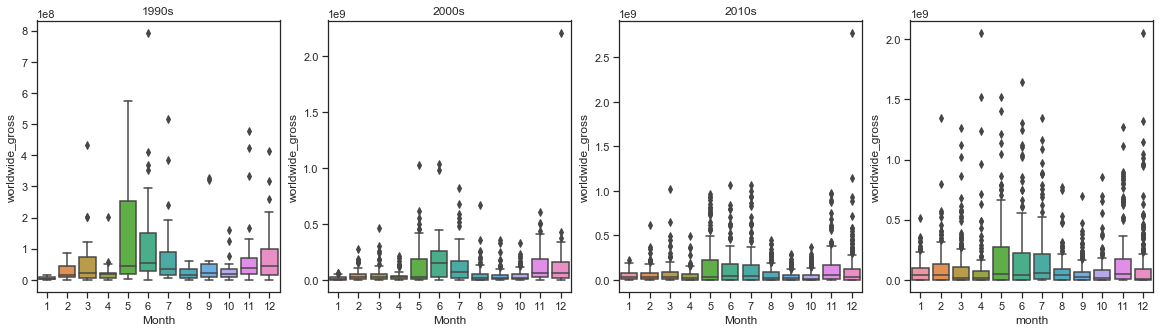

In [33]:
new_figure = plt.figure(figsize=(20,5))

# Add a subplot to the figure - a new axes
ax1 = new_figure.add_subplot(141)

# Add a second subplot to the figure - a new axes
ax2 = new_figure.add_subplot(142)
ax3 = new_figure.add_subplot(143)
ax4 = new_figure.add_subplot(144)

sns.boxplot(x='month',y='worldwide_gross',data=df1980, ax = ax1)
sns.boxplot(x='month',y='worldwide_gross',data=df1990, ax = ax2)
sns.boxplot(x='month',y='worldwide_gross',data=df2000, ax = ax3)
sns.boxplot(x='month',y='worldwide_gross',data=df2010, ax = ax4)
ax.set_title('1980s')
ax1.set_title('1990s')
ax2.set_title('2000s')
ax3.set_title('2010s')

ax.set_xlabel('Month')
ax1.set_xlabel('Month')
ax2.set_xlabel('Month')
ax3.set_xlabel('Month')


Text(0.5, 0, 'Day of Week')

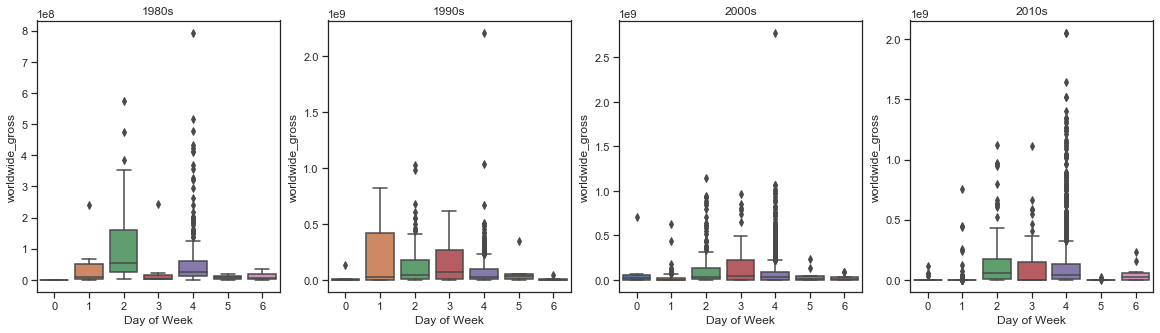

In [34]:
new_figure = plt.figure(figsize=(20,5))

# Add a subplot to the figure - a new axes
ax1 = new_figure.add_subplot(141)

# Add a second subplot to the figure - a new axes
ax2 = new_figure.add_subplot(142)
ax3 = new_figure.add_subplot(143)
ax4 = new_figure.add_subplot(144)

sns.boxplot(x='daynumber',y='worldwide_gross',data=df1980, ax = ax1)
sns.boxplot(x='daynumber',y='worldwide_gross',data=df1990, ax = ax2)
sns.boxplot(x='daynumber',y='worldwide_gross',data=df2000, ax = ax3)
sns.boxplot(x='daynumber',y='worldwide_gross',data=df2010, ax = ax4)
ax1.set_title('1980s')
ax2.set_title('1990s')
ax3.set_title('2000s')
ax4.set_title('2010s')

ax1.set_xlabel('Day of Week')
ax2.set_xlabel('Day of Week')
ax3.set_xlabel('Day of Week')
ax4.set_xlabel('Day of Week')